In [2]:
import minerl
import gym

data = minerl.data.make(
    'MineRLObtainDiamond-v0',
    data_dir='data')

In [11]:
import numpy as np

In [12]:
stored_action = None
for current_state, action, reward, next_state, done \
    in data.sarsd_iter(num_epochs=1, max_sequence_len=50000):
    if stored_action is None:
        stored_action = action
    else:
        for key in action:
            stored_action[key] = np.concatenate((stored_action[key], action[key]))
    if len(stored_action["attack"]) > 50000:
        break

In [13]:
len(stored_action["camera"])

65308

In [14]:
import matplotlib.pyplot as plt

In [16]:
len(stored_action["camera"][:,0 
                           ])

65308

In [85]:
camera = stored_action["camera"]

In [86]:
camera = camera[np.abs(camera[:, 0]) < 25]

In [87]:
camera = camera[np.abs(camera[:, 1]) < 25]

In [88]:
no_zeros = camera[np.all(camera != 0, axis=1)]

In [89]:
len(no_zeros)

14626

In [103]:
pos = no_zeros[no_zeros[:, 0] > 2]
pos = pos[pos[:, 1] > 2]

In [114]:
pos_0 = no_zeros[no_zeros[:, 0] > 0][:, 0]

In [108]:
pos_1 = no_zeros[no_zeros[:, 1] > 0.2][:, 1]

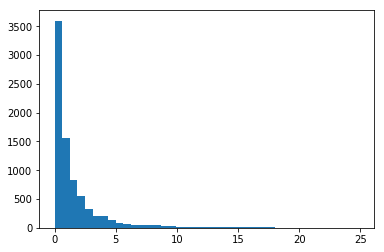

In [115]:
plt.hist(pos_0, bins=40)
plt.show()

(array([6.000e+00, 2.000e+00, 6.000e+00, 1.900e+01, 1.500e+01, 1.600e+01,
        4.800e+01, 4.400e+01, 8.200e+01, 1.150e+02, 1.910e+02, 2.920e+02,
        4.640e+02, 1.069e+03, 4.542e+03, 5.847e+03, 1.211e+03, 4.870e+02,
        2.060e+02, 1.220e+02, 8.800e+01, 4.900e+01, 3.500e+01, 3.000e+01,
        2.900e+01, 1.400e+01, 8.000e+00, 3.000e+00, 6.000e+00, 1.000e+01]),
 array([-24.9 , -23.24, -21.58, -19.92, -18.26, -16.6 , -14.94, -13.28,
        -11.62,  -9.96,  -8.3 ,  -6.64,  -4.98,  -3.32,  -1.66,   0.  ,
          1.66,   3.32,   4.98,   6.64,   8.3 ,   9.96,  11.62,  13.28,
         14.94,  16.6 ,  18.26,  19.92,  21.58,  23.24,  24.9 ],
       dtype=float32),
 <a list of 30 Patch objects>)

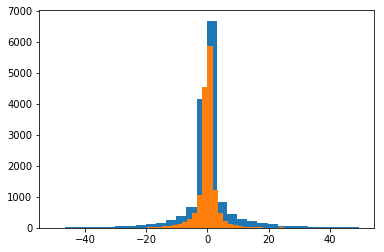

In [75]:
plt.hist(no_zeros[:, 1], bins=30)
plt.hist(no_zeros[:, 0], bins=30)


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 5.0000e+00, 1.0000e+01, 2.8000e+01, 9.5000e+01,
        7.0000e+02, 6.3175e+04, 1.1040e+03, 1.2500e+02, 3.8000e+01,
        1.0000e+01, 9.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-100.200005 ,  -91.582504 ,  -82.965    ,  -74.347496 ,
         -65.729996 ,  -57.112495 ,  -48.49499  ,  -39.877487 ,
         -31.259987 ,  -22.642485 ,  -14.024982 ,   -5.4074802,
           3.210022 ,   11.827524 ,   20.445026 ,   29.062529 ,
          37.68003  ,   46.29753  ,   54.915035 ,   63.53254  ,
          72.15004  ], dtype=float32),
 <a list of 20 Patch objects>)

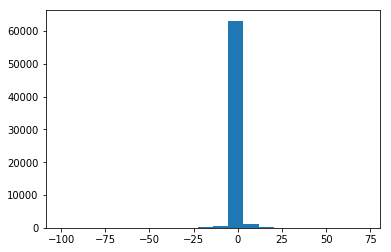

In [18]:
plt.hist(stored_action["camera"][:, 0], bins=20)

(array([2.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        7.0000e+00, 1.8000e+01, 7.6000e+01, 3.2600e+02, 2.0680e+03,
        6.1932e+04, 6.3200e+02, 1.7500e+02, 4.0000e+01, 1.4000e+01,
        7.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-162.44995  , -146.48996  , -130.52995  , -114.56996  ,
         -98.60996  ,  -82.64996  ,  -66.689964 ,  -50.72997  ,
         -34.76997  ,  -18.809973 ,   -2.8499756,   13.110022 ,
          29.070019 ,   45.030018 ,   60.990013 ,   76.95001  ,
          92.91001  ,  108.87001  ,  124.83     ,  140.79001  ,
         156.75     ], dtype=float32),
 <a list of 20 Patch objects>)

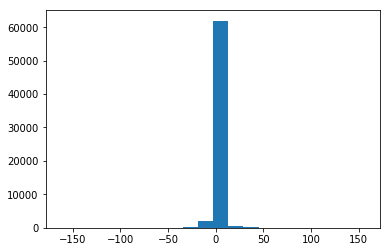

In [31]:
plt.hist(stored_action["camera"][:, 1], bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc75bc6a2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc75bc6a9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc75bc6a198>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc75bc74080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc75bc743c8>,
 'means': []}

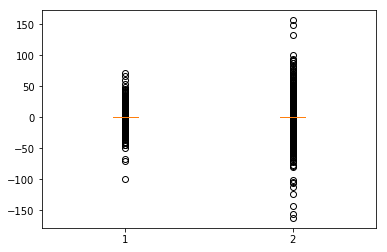

In [23]:
plt.boxplot([stored_action["camera"][:, 0], stored_action["camera"][:, 1]])

In [24]:
import seaborn as sns

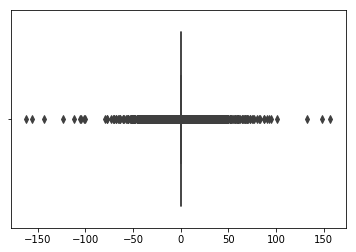

In [28]:
sns.boxplot(x=[stored_action["camera"][:, 0], stored_action["camera"][:, 1]])

In [2]:
rewards = []
all_rewards = []

actions = []
all_actions = []

# Iterate through a single epoch gathering sequences of at most 32 steps
for current_state, action, reward, next_state, done \
    in data.sarsd_iter(
        num_epochs=1, max_sequence_len=1):

        rewards.append(reward)
        actions.append(action)
        #print(done)
        #print(reward)
        if done.any():
            all_rewards.append(rewards)
            rewards = []
            all_actions.append(actions)
            actions = []
            if len(all_rewards) > 10:
                break


In [3]:
import matplotlib.pyplot as plt

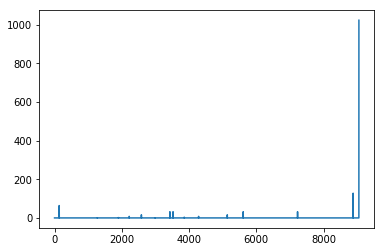

In [31]:
plt.plot(all_rewards[5])

In [32]:
actions = all_actions[5]

In [33]:
actions[0]

OrderedDict([('attack', array([0])),
             ('back', array([0])),
             ('camera', array([[ 2.427845, 22.174377]], dtype=float32)),
             ('craft', array([0])),
             ('equip', array([0])),
             ('forward', array([1])),
             ('jump', array([0])),
             ('left', array([0])),
             ('nearbyCraft', array([0])),
             ('nearbySmelt', array([0])),
             ('place', array([0])),
             ('right', array([0])),
             ('sneak', array([0])),
             ('sprint', array([0]))])

In [4]:
def action_dict2counts(action_dict):
    return action_dict["attack"], action_dict["forward"]

def episode_actions_2counts(episode_actions):
    mean_dict = episode_actions[0]
    for key in mean_dict:
        mean_dict[key] = []
    print("Initial mean dict: ", mean_dict)
    forwards = 0
    attacks = 0
    total = len(episode_actions)
    for action in episode_actions:
        for key in action:
            act = action[key]
            if act == []:
                continue
            if isinstance(act, list) and len(act) == 1:
                act = act[0]
            mean_dict[key].append(act)
    return mean_dict

In [5]:
actions = episode_actions_2counts(all_actions[1])

Initial mean dict:  OrderedDict([('attack', []), ('back', []), ('camera', []), ('craft', []), ('equip', []), ('forward', []), ('jump', []), ('left', []), ('nearbyCraft', []), ('nearbySmelt', []), ('place', []), ('right', []), ('sneak', []), ('sprint', [])])


/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  from ipykernel import kernelapp as app
/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

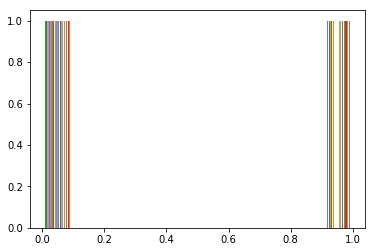

In [6]:
plt.hist(actions["attack"])

In [7]:
len(actions["attack"])

3922